In [24]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm, fractional_matrix_power
import cmath

#########################################################################

# pauli matrix 
sx = np.array([[0,  1],     [1, 0]])
sy = np.array([[0, -1j],   [1j, 0]])
sz = np.array([[1, 0],     [0, -1]])
s0 = np.array([[1, 0],      [0, 1]])

# parameters(detuning factor)
v0 = 0.02           # Arbitrary settings, Actual speed : 0.04rad/μs
d0 = 0.15           # Arbitrary settings, Actual speed : 0.30rad/μs


# unitary operator
def unitary(dt, choice):
    
    # Select x,y-rotation direction.
    # [stay, +x, -x, +y, -y]
    choice_list = [0, 1, -1, 1, -1] 
    
    if choice < 3:
        # if choice = 0 ... only d0*sz
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else:
        Ham = (d0*sz+v0*choice_list[choice]*sy)

    # Creating a Unitary Operator for each of the four sections by Hamiltonian
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    
    return U_e


#########################################################################

# x-rotation operater
def Rx(theta):
    return np.matrix([  [cos(theta/2),    -1j*sin(theta/2)],
                        [-1j*sin(theta/2),    cos(theta/2)]])

# z-rotation operater
# Do not use Rz. Control by rotation only by Hamiltonian.
def Rz(phi): 
    return np.matrix([  [cos(phi/2)-1j*sin(phi/2),  0],
                        [0,  cos(phi/2)+1j*sin(phi/2)]])

# Calculating the Fidelity
def state_fidelity(rho_1, rho_2): 
    
    # rho_1(current state), rho_2(target state)
    # Calculate the fidelity after checking the dimensions of the two states.
    
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


#########################################################################

In [25]:
dt = 2.86
target_theta = 1.7967252946555432
target_phi = 0.8393363923487784
combi = [1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3]
print(len(combi))
print(dt*len(combi))

18
46.800000000000004


In [26]:
init_wave = np.array([[1], [0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

target_U = Rz(target_phi) @ Rx(target_theta)
irho_target = target_U @ irho_init @target_U.conj().T


# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [27]:
k = 50
combination = []

for i in combi :
    combination += [i for j in range(k)]

print(combination)

dt = dt/k

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

[1.622366513073733e-05, -0.002079914136444701, 0.9999978368446486]
0.38867721732720634
[6.489064222470832e-05, -0.004159313117077857, 0.9999913479143687]
0.3893724108437855
[0.00014598887738235964, -0.00623768191368238, 0.9999805348163472]
0.3900795270952805
[0.00025949828408838025, -0.00831450575319849, 0.9999654002287857]
0.3907983709126263
[0.00040539074818675517, -0.010389270245223362, 0.9999459479002387]
0.39152877459406055
[0.0005836301348441163, -0.01246146150941602, 0.9999221826486838]
0.3922705486609189
[0.0007941722974996639, -0.014530566302775865, 0.999894110360329]
0.3930235281297094
[0.001036965088799444, -0.016596072146763362, 0.9998617379881551]
0.39378749927157003
[0.0013119483735122726, -0.018657467454231406, 0.9998250735501929]
0.39456229515005414
[0.0016190540434241059, -0.020714241656135852, 0.9997841261275375]
0.39534770938296715
[0.0019582060342071715, -0.022765885327993948, 0.9997389058620991]
0.3961435616586552
[0.0023293203442596787, -0.024811890316059224, 0.99

0.4139300574692431
[0.016265192491035807, -0.06378185440291254, 0.9978313076678428]
0.41489587638702774
[0.01727435771891597, -0.06559563253114817, 0.9976967523041249]
0.4158672863730646
[0.018311691741894263, -0.06739316384865343, 0.9975584411010605]
0.41684404229701527
[0.01937693763174414, -0.069174003140557, 0.9974164083157465]
0.4178258967012339
[0.020469831546991932, -0.07093770932628993, 0.9972706891270463]
0.4188126211453198
[0.02159010279826542, -0.07268384556883306, 0.9971213196268759]
0.41980396475346227
[0.022737473915338566, -0.0744119793829134, 0.9969683368112655]
0.4207996824892065
[0.023911660715855664, -0.07612168274212265, 0.9968117785711961]
0.42179951792994363
[0.025112372375718003, -0.07781253218493128, 0.9966516836832139]
0.42280323539912157
[0.02633931150111556, -0.07948410891957203, 0.9964880917998269]
0.42381057914332737
[0.02759217420218587, -0.08113599892776685, 0.9963210434396835]
0.42482130676605256
[0.028870650168281865, -0.08276779306727142, 0.99615057997

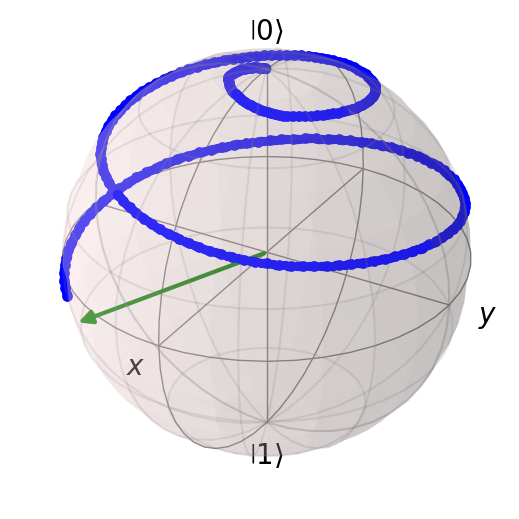

In [28]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list = []
z = []
y = []

for i in combination:
    instant_U = unitary(dt, i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid * sx).real,
             np.trace(irho_mid * sy).real,
             np.trace(irho_mid * sz).real]
    b.add_points(point, 'm')
    print(point)
    z.append(np.trace(irho_mid * sz).real)
    y.append(np.trace(irho_mid * sy).real)
    point_list.append(point)
    print(state_fidelity(irho_target, irho_mid))

vector = np.array([np.trace(irho_target * sx).real,
             np.trace(irho_target * sy).real,
             np.trace(irho_target * sz).real])

print(state_fidelity(irho_target, irho_mid))

b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
#b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [29]:
state_fidelity(irho_mid, irho_target)

0.9950889185314189